

# Investigating the No-Show appointments dataset from Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
Potential insights I will be extracting from the dataset will include:

1. Is the rate of attendance affected by age?
2. What is the relationship between the rate of attendace and gender?
3. what is the relationship between welfare status and attendance?
4. What is the relationship between alcoholism and attendance?
5. what is the relationship between the other categorical variables and the rate of attendance?
6. How is Diabetes distributed between the two genders?
7. What does the distribution of hypertension looks like between the two genders?
8. What is the realtionship between gender and alcoholism? 
9. What is the relationship between gender and being handicap?
10. Which gender received more text messages?

In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [7]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv(r'C:\Users\HP\Downloads\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
# let's check out the shape of the dataset

df.shape

(110527, 14)

this dataset has 110,527 rows and fourteen columns

In [10]:
# In this step, I will be looking at the columns
list(df.columns)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# In this step, I shall be checking for duplicated data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [14]:
sum(df.duplicated())

0

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [26]:
#another important investigation is finding the unique values in the columns of interest



In [12]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [13]:
list(set(df['Hipertension']))

[0, 1]

In [14]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [15]:
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [15]:
list(set(df['Handcap']))

[0, 1, 2, 3, 4]

In [16]:
list(set(df['SMS_received']))

[0, 1]

In [17]:
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [18]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

# Key findings from the wrangling stage

1. Maximum age from the sample is 115, which is an age when chronic conditions are most prevalent.
2. Minimum age is -1, which could be a data entry error, or the particular subject is an infant, and the data entry software/tool doesnt have provisions for entering age in months or weeks or days, we will be dealing with it in the next section under data cleaning.
3. Lucky enough, we do not have any missing values in our datasets.
4. There also appears to be some mistakes in the naming of some columns; "Hipertension" needs to be changed to "Hypertension", and "Handcap" to "Handicap".
5. The column name "Scholarship", used to refer to people that are enrolled on welfare is not appropriate, and will be changed to Welfare_status



### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [ ]:
# I will be renaming the columns titled 'Handcap', 'Hipertension' and 'Scholarship'

In [16]:
#renaming Handcap to Handicap,

df.rename({'Hipertension':'Hypertension', 'Handcap':'Handicap', 'Scholarship':'Welfare_status', 'No-show':'No_show'}, axis=1, inplace=True)

In [21]:
#Checking to see if the changes are effective and if the code runs....
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Welfare_status,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#Some of the columns are unnecesary in the grand scheme of things as far as my analysis is concerned, as such, I shall drop 
#them in the next step 

df.drop(columns=['PatientId', 'AppointmentID'], inplace=True)

In [23]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Welfare_status,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
# In this step, the values of 0 and -1 in the age column, beign extreme outliers, will be replaced with the mean
meanAge = round(df['Age'].mean())
meanAge

37

In [25]:
mask = df.query('Age < 0')
mask

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Welfare_status,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [26]:
# I will now use pandas dataframe.loc function to change the '-1' value with the meanAge
mask = df['Age'] == -1
df.loc[mask, 'Age'] = meanAge

In [27]:
# I will now check the index location to see if the age has been changed to the meanAge value

df.iloc[99832]

Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 37
Neighbourhood                    ROMÃO
Welfare_status                       0
Hypertension                         0
Diabetes                             0
Alcoholism                           0
Handicap                             0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

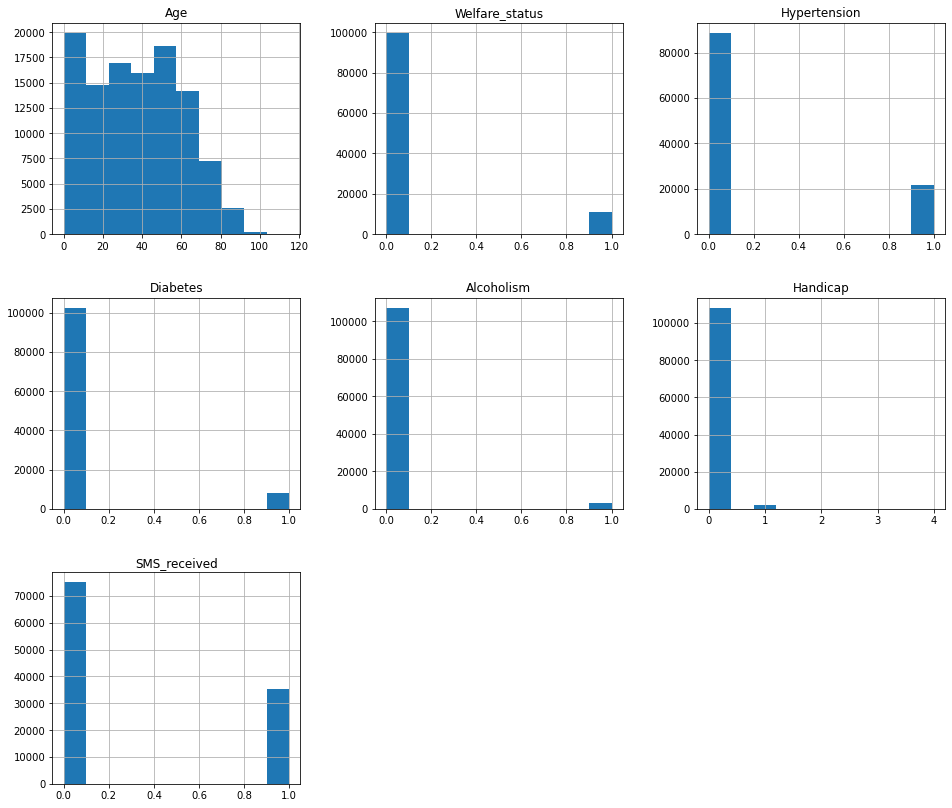

In [28]:
# I will now visualize the data on histograms to get a feel of what it looks like

df.hist(figsize=(16,14));

<a id='eda'></a>
## Exploratory Data Analysis


### Research question one: What is the relationship between the rate of attendace and gender?

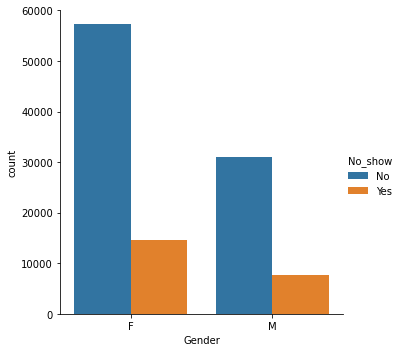

In [17]:
# I will be answering this question with a catplot
sns.catplot(x ="Gender", hue ="No_show",
kind ="count", data = df)

The catplot illustrates that, there is a higher proportion of females, compared to males who have made appointments at the clinic/hospital, it also shows that more females showed up on the day of the appointment compared to their male counterparts.

### Research question 2: What is the relationship between age and showing up on the appointment day?

<AxesSubplot:xlabel='Gender', ylabel='Age'>

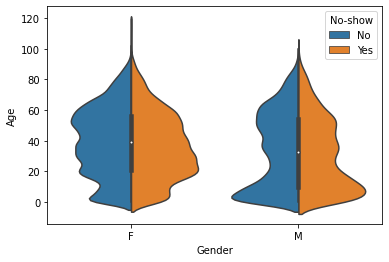

In [30]:
# This will be illustrated with a violin plot

sns.violinplot(x ="Gender", y ="Age", hue ="No_show",
data = df, split = True)


The violin plot above gives a summary of the age range of males and females within the context of presence or absence on the 
apponitment day. Mean age between genders appears to be around 38 for females, and about 37 for males. The attendance rate is –  

1. High amongst children.
2. High for women in the age range 20-60.
3. Less for men as the age increases.

## Research question 3: what is the relationship between welfare status and attendance?

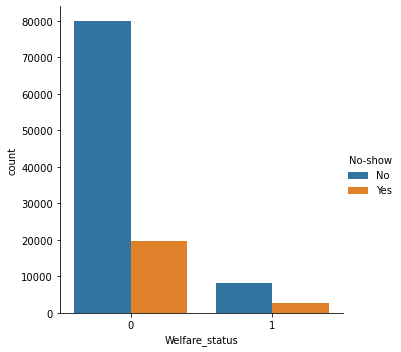

In [31]:
sns.catplot(x ="Welfare_status", hue ="No_show",
kind ="count", data = df)

The plot above illustrates the relationship between attendance rates between people on welfare and those not on welfare. It shows that overwhelmignly, those on welfare made more appointments at the clinic and were present on the designated day when compared to those not on welfare. The Bolsa familia was a conditional cash transfer program in Brazil, which awarded parents cash, for vaccinating their children and taking them to hospitals to access healthcare, this may be the reason why attendance rates are high for children and women.

# Research question 4: what is the relationship between the other categorical variables and the rate of attendance

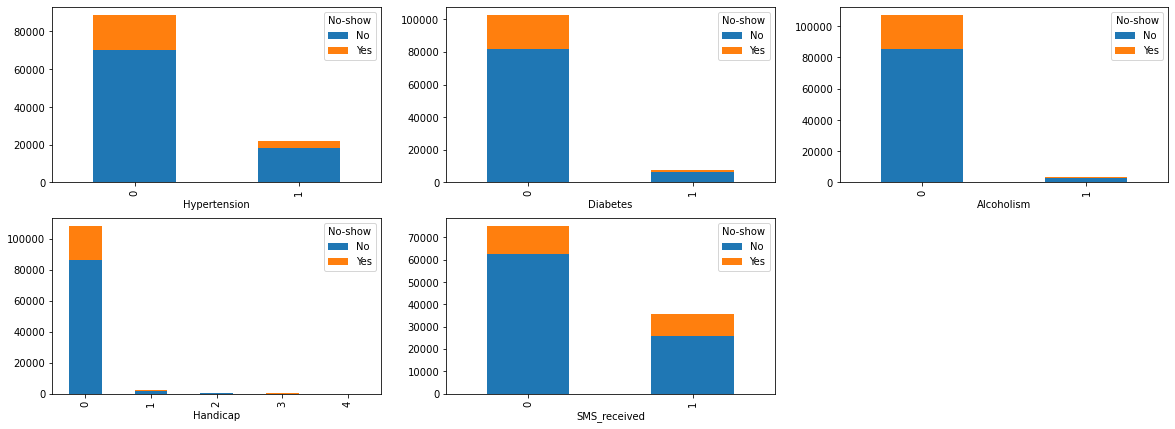

In [34]:
# rather than making plots for individual variables on the table, I am going to lump them into a single variable, and then 
# facet the plots with respect to attendance rates.

categorical_vars = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
fig = plt.figure(figsize=(20, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No-show').plot(ax=ax, kind='bar', stacked=True)

## Research question 5: What is the prevalence of Diabetes between the two genders?

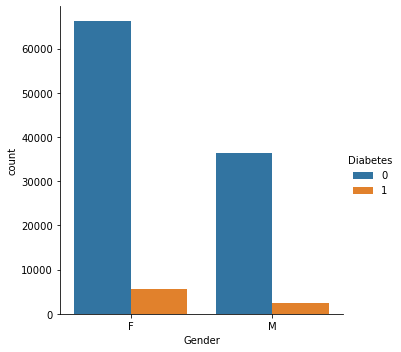

In [35]:
sns.catplot(x ="Gender", hue ="Diabetes",
kind ="count", data = df)

The general prevalence of DM appears to be low in the population, although, the plot reveals that the proportion of females with diabetes is almost twice as much as that of males with the disease.

## Research question 6: What does the distribution of hypertension looks like between the two genders?

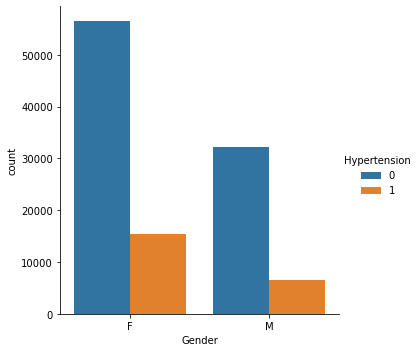

In [36]:
sns.catplot(x ="Gender", hue ="Hypertension",
kind ="count", data = df)

The plot reveals that about 15,000 females are hypertensive in comparison to about 6,000 males only


## Research question 7: What is the realtionship between gender and alcoholism? 

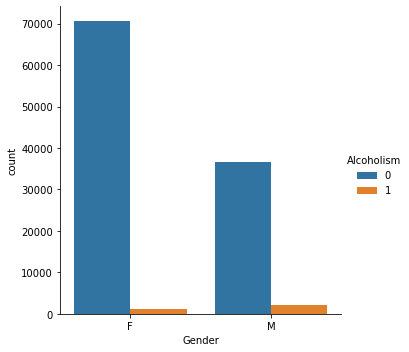

In [37]:
sns.catplot(x ="Gender", hue ="Alcoholism",
kind ="count", data = df)

Although there are far more female patients, the prevalence of alcoholism is higher amongst their male counterparts. Alcoholism is however low amongst both genders

# # Research question 8: What is the relationship between gender and being handicap?

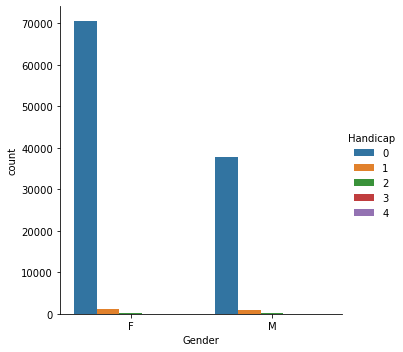

In [38]:
sns.catplot(x ="Gender", hue ="Handicap",
kind ="count", data = df)

The plot reveals that only a minute fraction of both genders have a disability.

## Which gender received more text messages? 

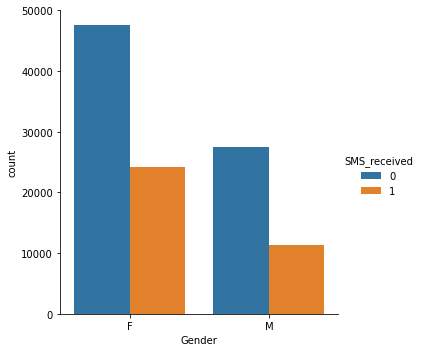

In [12]:
sns.catplot(x ="Gender", hue ="SMS_received",
kind ="count", data = df)

It appears that almost half of the subjects from both gender groups received sms reminders, and based on the earlier plot investigating the relationship between SMS reminder and rate of attendance, we can conclude that it had no significant impact on influencing people to come to the clinic/hospital on the scheduled day

In [18]:
#Finally, I will now visually analyse the rate of attendance accross the neighbourhoods, first by creating masks to stratify the 
# No-show column into 'present' signifying those who came on their appointment day, and 'absent', for those that did not.
# I will then write a FUNCTION that produces the plot
# Making Masks For Attend and Not Attend Patients
Present= df.No_show == 'No'
Absent=df.No_show=='Yes'

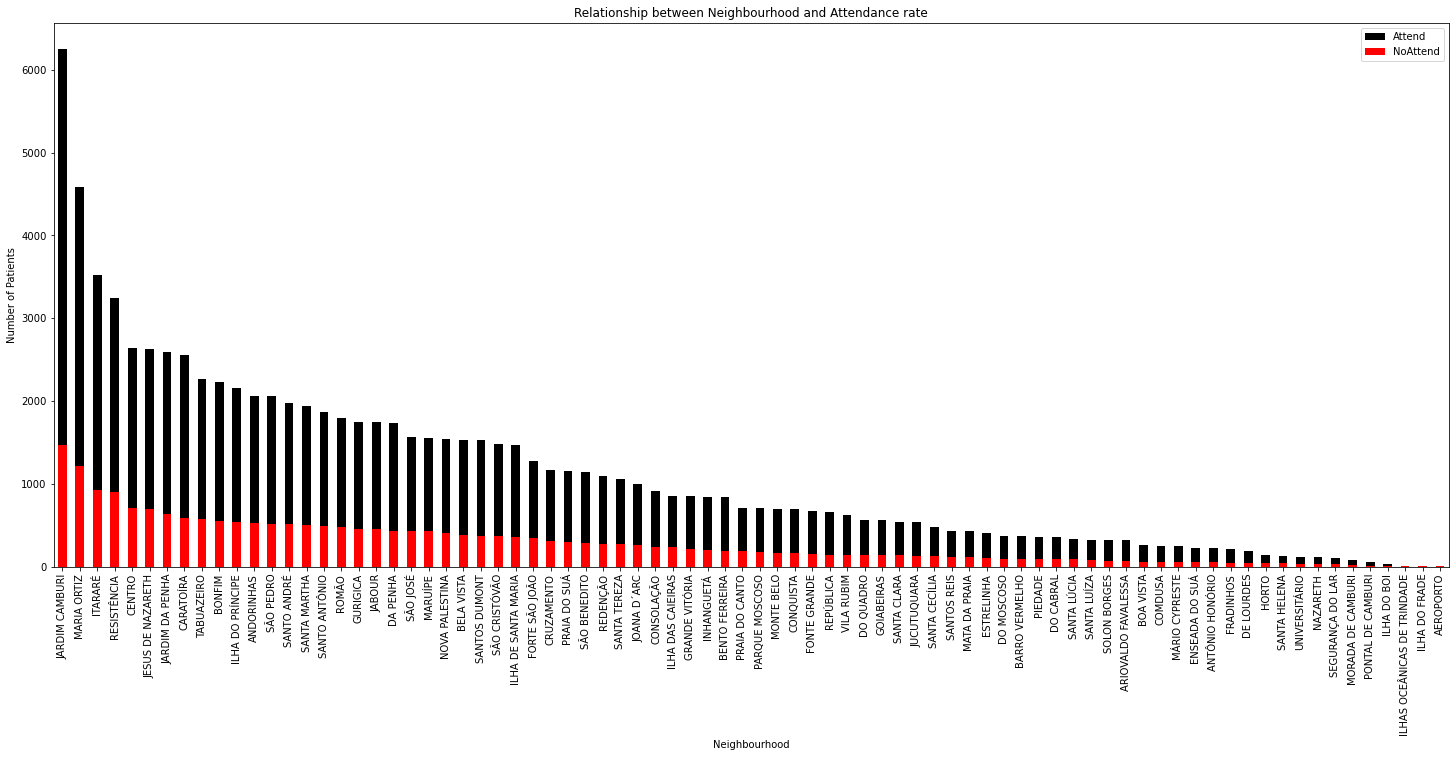

In [25]:
def Neighbourhood_Rship (Present,Absent):
    plt.figure(figsize=[25,10])
    df['Neighbourhood'][Present].value_counts().plot(kind='bar',color='black',label='Attend')
    df['Neighbourhood'][Absent].value_counts().plot(kind='bar',color='Red',label='NoAttend')
    plt.title('Relationship between Neighbourhood and Attendance rate')
    plt.legend();
    plt.xlabel('Neighbourhood')
    plt.ylabel('Number of Patients');

Neighbourhood_Rship (Present,Absent)

<a id='conclusions'></a>
## Conclusions

1. There are many young subjects in the dataset, more females than males, and the numbers whittle down beyond the age of 60
2. People who are on welfare, who showed up on their appointment days are much more in number than those who are not on welfare.
3. Sending SMS reminders was not effective in increasing the attendance rate.
4. There is low incidence of diabetes, hypertension, alcoholism and disabilities amongst the subjects.
5. Mean age is 37, while the maximum age is a staggering 115!
6. The neighbourhood of "Jardim Camburi" had the highest number of booked appointments, and the highest rate of attendance by far, when compared to other neighbourhoods.


## Limitations

1. The data only provides a snapshot of the medical attendance records, hence no predictions can be made about future attendace with the data available.
2. We cannot use the data available to establish temporal realtionships, establish causation, prove hypotheses or correlations.
3. It is unclear if the unique values of the 'Handicap' column indicate ranking or severity or type of handicap the subject has.